# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import yaml

# Load Data for False Analysis

In [2]:
df = pd.read_csv('../output/false_analysis_df/false_analysis.csv')

In [3]:
df.tail(10)

,game_id,bot_score,bot_rating,user_score,user_mean_rack_usage,mean_average_letter_score,bot_difficulty,is_first_play,negative_end_reason,lexicon_encoded,game_end_reason_encoded,rating_mode_encoded,initial_time_seconds,game_duration_seconds,winner,user_rating,predicted_user_rating,error
2051,32896,473,2095,402,0.609524,1.774444,2,1,0,0,2,1,1200,582.469832,0,2000,2000.3768,0.376831
2052,18607,474,1703,371,0.590476,1.563333,1,0,0,3,2,0,1200,416.148273,0,1590,1589.6430,0.357056
2053,46009,455,1956,304,0.575630,0.965826,1,1,0,0,2,1,900,275.952246,0,1801,1801.3479,0.347900
2054,43490,458,1805,374,0.573214,1.558036,2,0,0,3,2,1,1500,637.632441,0,1685,1685.3308,0.330811
2055,24434,413,1881,326,0.582418,1.519414,1,0,0,0,2,1,300,147.547719,0,1662,1661.6736,0.326416
2056,60914,332,1641,299,0.600000,1.371429,1,0,0,3,2,0,1200,468.076375,0,1590,1589.6873,0.312744
2057,2029,426,2096,449,0.690476,1.408929,2,1,0,0,2,1,1080,362.489202,1,1970,1970.2789,0.278931
2058,30933,358,1962,390,0.642857,1.548810,1,0,0,0,2,1,780,293.646610,1,1901,1900.7922,0.207764
2059,30678,373,2039,395,0.844444,1.463492,1,1,0,0,2,1,1200,600.311929,1,1986,1985.8407,0.159302
2060,2179,459,2062,419,0.684524,1.935218,2,0,0,0,2,0,1440,689.777338,0,1974,1974.0139,0.013916


In [4]:
df.head(10)

,game_id,bot_score,bot_rating,user_score,user_mean_rack_usage,mean_average_letter_score,bot_difficulty,is_first_play,negative_end_reason,lexicon_encoded,game_end_reason_encoded,rating_mode_encoded,initial_time_seconds,game_duration_seconds,winner,user_rating,predicted_user_rating,error
0,41869,342,2224,463,0.630037,2.050366,3,0,0,0,2,1,3600,1240.420361,1,1446,2044.5184,598.518433
1,67278,498,2001,207,0.401786,1.426042,1,1,0,0,2,1,1200,550.344607,0,2101,1510.1233,590.876709
2,32391,445,1803,316,0.457143,1.978889,1,1,0,0,2,1,180,148.421598,0,2370,1806.8953,563.104736
3,44614,581,2261,316,0.617914,1.562018,3,1,0,0,2,0,1200,1220.692372,0,1248,1789.8975,541.897461
4,52278,417,1890,394,0.553247,1.610011,1,0,0,0,2,1,780,543.052814,0,1290,1824.8864,534.886353
5,35047,473,2135,374,0.727273,1.682035,2,0,0,0,2,1,1200,564.034429,0,1525,2041.0947,516.094727
6,31041,362,2230,436,0.781746,1.422222,3,0,0,0,2,0,3600,471.182059,1,1464,1969.2051,505.205078
7,21866,441,2200,233,0.642857,1.504464,3,1,1,0,3,0,1200,1263.322324,0,1248,1736.4387,488.438721
8,51594,393,2047,274,0.613095,1.737037,1,1,0,0,2,0,900,452.237675,0,1262,1743.2472,481.247192
9,64635,456,2098,393,0.500000,2.132440,2,1,0,0,2,1,1200,761.887396,0,1461,1930.3573,469.357300


# Analyze Error Distribution

## Plot Distribution of Prediction Errors Graph

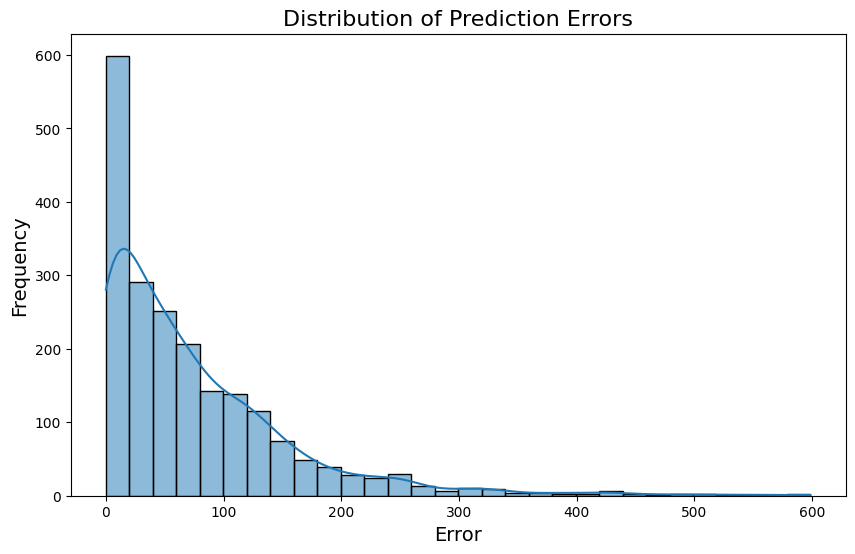

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['error'], bins=30, kde=True)
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Summary of Error Distribution Analysis

The distribution of prediction errors reveals that the model's overall performance is strong. 

1. **Good Calibration:** The majority of errors are concentrated in the range of **0–100**, with a sharp peak near zero. This indicates that the model is well-calibrated and provides accurate predictions for most cases in the dataset.
2. **Generalization Capability:** The consistent low-error performance across a large portion of the data suggests that the model generalizes well to the validation set, capturing the key relationships between features and the target variable effectively.
3. **Presence of Edge Cases:** A small proportion of the data shows higher errors (above **300**), which are likely due to specific edge cases or outliers. These cases do not detract significantly from the overall performance but highlight areas for potential refinement.
4. **Right-Skewed Distribution:** The right-skewed nature of the error distribution reflects the model's robustness, as the majority of predictions fall within a narrow range of errors, with only a few outliers.

Overall, the model demonstrates strong performance, particularly in its ability to handle the majority of predictions accurately while maintaining reasonable generalization. The few high-error cases are worth investigating further but do not compromise the model's effectiveness for the majority of the dataset.


# Investigate Feature Importance

## Load Best Model

In [7]:
with open('../config/file_paths.yaml', 'r') as file:
    file_paths = yaml.safe_load(file)

best_model_path = "../" + file_paths['output_path']['best_model']

with open(best_model_path, 'rb') as f:
    best_model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [8]:
print(type(best_model))

<class 'xgboost.sklearn.XGBRegressor'>


## Check importance of features for XGBoost Model

In [9]:
# Check if the loaded model has feature importance
if hasattr(best_model, 'feature_importances_'):
    # For Scikit-learn API models
    importances = best_model.feature_importances_
    feature_names = best_model.get_booster().feature_names
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
else:
    # For XGBoost native Booster models
    booster = best_model.get_booster()
    importance = booster.get_score(importance_type='weight')
    importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature importance:")
print(importance_df)

Feature importance:
                      Feature  Importance
9             lexicon_encoded    0.622585
11        rating_mode_encoded    0.166471
2                  bot_rating    0.065172
6              bot_difficulty    0.033313
3                  user_score    0.027046
12       initial_time_seconds    0.023528
14                     winner    0.010906
4        user_mean_rack_usage    0.010454
13      game_duration_seconds    0.009739
10    game_end_reason_encoded    0.008522
8         negative_end_reason    0.007348
5   mean_average_letter_score    0.004642
1                   bot_score    0.004370
7               is_first_play    0.003344
0                     game_id    0.002559


## Feature Importance Plot

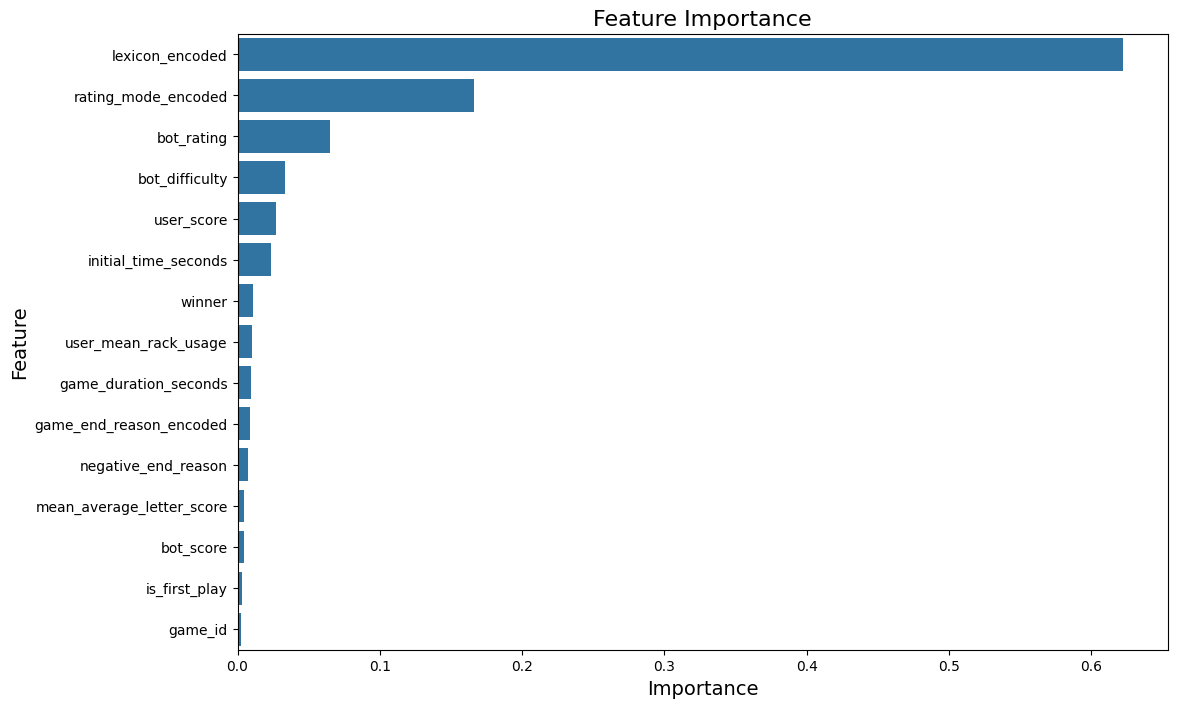

In [10]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

# Check for Patterns in High Errors

## Group by `lexicon_encoded` and `rating_mode_encoded`

In [6]:
grouped_errors = df.groupby(['lexicon_encoded', 'rating_mode_encoded']).agg(
    mean_error=('error', 'mean'),
    count=('error', 'count')
).sort_values(by='mean_error', ascending=False)
print("Error grouped by lexicon_encoded and rating_mode_encoded:")
grouped_errors.head(10)

Error grouped by lexicon_encoded and rating_mode_encoded:


mean_error  count
lexicon_encoded rating_mode_encoded                   
0               0                    102.194722    198
                1                     90.149451   1058
3               1                     72.994663    412
1               1                     69.262756      2
3               0                     61.723828    115
1               0                      2.080627    276

## Summary of High-Error Patterns

1. **Model Struggles with Specific Encoded Features:**
   - High errors are observed for `lexicon_encoded = 0`, suggesting this group may lack sufficient representation or informative features.
   - `rating_mode_encoded = 0` and `rating_mode_encoded = 1` also correlate with higher errors, indicating challenges in generalization for these patterns.

2. **Frequent High-Error Groups Impact Overall Performance:**
   - The combination of `lexicon_encoded = 0` and `rating_mode_encoded = 1` shows both high mean error and frequent occurrence, significantly affecting the overall model performance.

3. **Certain Groups Show Model Strengths:**
   - Groups like `lexicon_encoded = 1` and `rating_mode_encoded = 0` exhibit low mean errors, highlighting areas where the model is performing well and features are predictive.

# Visualize Relationships

## Scatter plot of initial_time_seconds vs. error

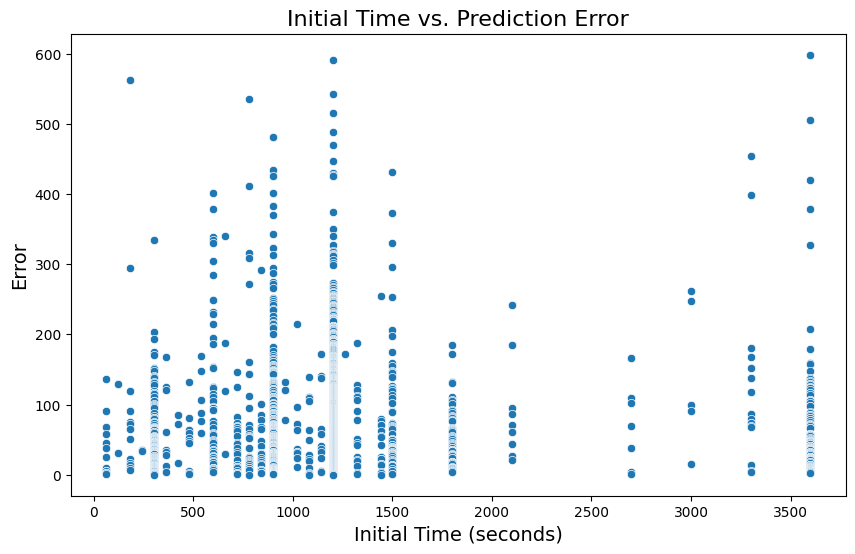

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='initial_time_seconds', y='error', data=df)
plt.title('Initial Time vs. Prediction Error', fontsize=16)
plt.xlabel('Initial Time (seconds)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.show()

## Observation: Initial Time vs. Prediction Error

There is no clear linear or monotonic relationship between `initial_time_seconds` and the prediction error. Errors appear to be distributed across the range of initial times.

## Scatter plot of game_duration_seconds vs. error

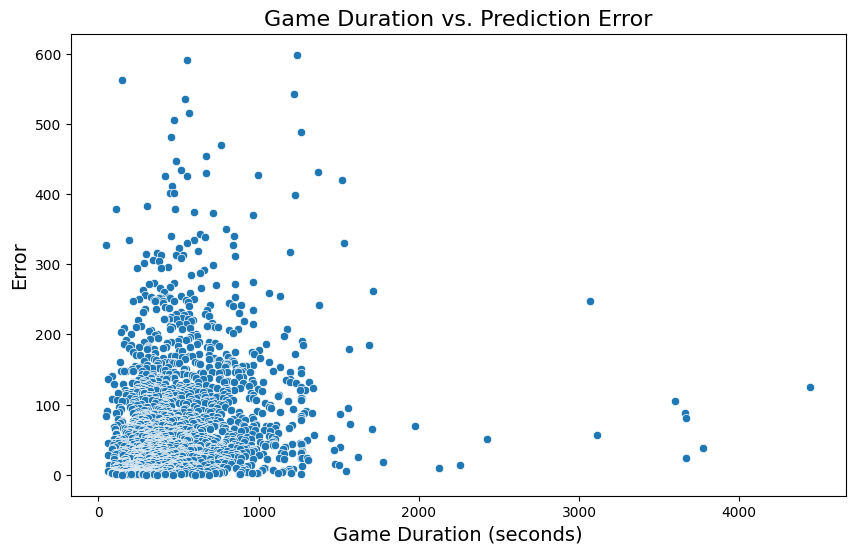

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='game_duration_seconds', y='error', data=df)
plt.title('Game Duration vs. Prediction Error', fontsize=16)
plt.xlabel('Game Duration (seconds)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.show()

## Observation: Game Duration vs. Prediction Error

1. **High Density for Shorter Durations:**
   - The majority of games have a duration of less than 1000 seconds, dominating the dataset.

2. **Wider Error Spread for Short Durations:**
   - For shorter game durations (`< 1000 seconds`), errors range widely from low to high, indicating that the model struggles to consistently predict for these cases.

3. **Better Performance for Longer Durations:**
   - For longer game durations (`> 2000 seconds`), errors tend to cluster near zero, suggesting better model performance for games with longer durations.

4. **Sparse Data for Very Long Games:**
   - Very few data points exist for games longer than 3000 seconds, highlighting potential underrepresentation in the dataset and possible challenges for model generalization in these cases.
